# Linear Least Squares

In class we derived the formula for linear least squares of one variable. In this notebook you will learn a bit of the numerical library numpy, use numpy to compute linear regression, and then compute it yourself using formulas from class

Begin by running the cell below. Then go back and carefully read through all the code. There is a lot of new stuff here. Note how to create numpy arrays/matrices and how to compute a linear least squares regression.

Slope (a): 0.6000
Intercept (b): 2.2000


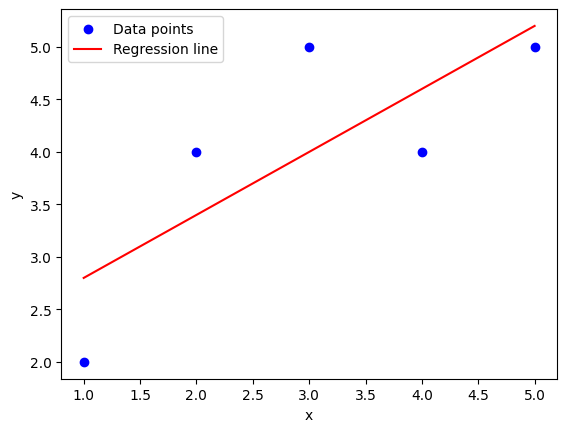

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare your data
# x: Independent variable (input)
# y: Dependent variable (output)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Step 2: Perform linear regression using the least squares method

# Add a column of ones to the input data for the intercept (bias term)
X = np.vstack([x, np.ones(len(x))]).T

# Calculate the slope (m) and intercept (b)
a, b = np.linalg.lstsq(X, y, rcond=None)[0]

print(f"Slope (a): {a:.4f}")
print(f"Intercept (b): {b:.4f}")

# Step 3: Predict y values using the regression line
y_pred = a * x + b

# Optional: Plot the data and the regression line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## An aside about numpy matrices

What happened to x? Here's the original $x$, which is an array

In [3]:
x

array([1, 2, 3, 4, 5])

We add a row of 1s after it and take the transpose to get the input matrix $X$

In [4]:
X

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.]])

Breaking this down into pieces, first let's make a python list that contains $x$ and an array of ones

In [5]:
[x,np.ones(len(x))]

[array([1, 2, 3, 4, 5]), array([1., 1., 1., 1., 1.])]

Now let's use numpy to make a vertical stack. The first element in the list becomes the first row

In [6]:
np.vstack([x, np.ones(len(x))])

array([[1., 2., 3., 4., 5.],
       [1., 1., 1., 1., 1.]])

And now take the transpose

In [7]:
np.vstack([x, np.ones(len(x))]).T

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.]])

### Practice with matrices

Make a numpy matrix that is a row of 5 zeros followed by a row of 5 ones, then 5 zeros, then 5 ones again. Use built in functions and `vstack` (don't just type a bunch of 0 and 1 -- can you guess the name of a function that makes an array of zeros?)

In [8]:
np.vstack([np.zeros(5), np.ones(5), np.zeros(5), np.ones(5)])

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.]])

Now make a similar matrix that is a row of all 1s followed by all 2s in the second row, then 3s then 4s. Again use built in function `np.ones`. Name this matrix `M`. Hint: $[2,2,2,2,2] = 2\cdot[1,1,1,1,1]$

In [9]:
M = np.vstack([i * np.ones(5) for i in range(1, 6)])
M

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5.]])

compute M times M transpose and M transpose times M ($MM^T$ and $M^TM$). In `numpy` $AB$ can be computed with `A @ B` for matrices `A` and `B`

In [10]:
MMt = M @ M.T
MtM = M.T @ M
MMt, MtM

(array([[  5.,  10.,  15.,  20.,  25.],
        [ 10.,  20.,  30.,  40.,  50.],
        [ 15.,  30.,  45.,  60.,  75.],
        [ 20.,  40.,  60.,  80., 100.],
        [ 25.,  50.,  75., 100., 125.]]),
 array([[55., 55., 55., 55., 55.],
        [55., 55., 55., 55., 55.],
        [55., 55., 55., 55., 55.],
        [55., 55., 55., 55., 55.],
        [55., 55., 55., 55., 55.]]))

A matrix $M$ is *symmetric* if $M = M^T$. This also implies $M_{ij} = M_{ji}$ for all indices $(i,j)$. Write a python function `is_symmetric(M)` which returns `true` if and only if $M$ is symmetric

In [11]:
def is_symmetric_np(M):
    return np.array_equal(M, M.T)
def is_symmetric(M):
    for i in range(len(M)):
        for j in range(i + 1, len(M[i])):
            if M[i][j] != M[j][i]:
                return False
    return True
            

Test your function. Make a 5 by 5 random integer matrix (see `np.random.randint`) called $M$. It is a fact that $MM^T$ is always symmetric. Check that your function return `true` for $MM^T$ and `false` for $M$. Repeat this trial 100 times and verify all 100 are correct.

In [12]:
print("M\tMMt")
for i in range(100):
    M = np.vstack([np.random.randint(0, 100, size=5) for i in range(0, 5)])
    print(is_symmetric(M), end = "\t")
    print(is_symmetric(M.T @ M))

M	MMt
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
False	True
Fals

## Linear Least Squares Regression

You can create a vector of normally distributed samples with mean $\mu$ and standard deviation $\sigma$ by using the numpy function `np.random.normal(mu, sigma, n)`. Try creating a vector with 10 random samples, with a mean of 100 and a standard deviation of 5.

In [13]:
arr = np.random.normal(100, 5, 10)
arr

array([ 89.78028552, 100.47761547, 110.18920428, 104.39191637,
        91.20143332, 100.05486254, 104.5280227 , 101.30904659,
        96.61487429, 101.96616564])

Now create some data for linear regression. Make a vector $x$ of ints over the range $[0,9]$ and let $y$ be a linear function of $x$, $y = 3x+2+\epsilon(x)$ where $\epsilon(x)$ is a random Gaussian noise function $\epsilon(x) \sim N(0,1)$. Make a scatter plot of $y$ vs. $x$ and label it

Text(0, 0.5, 'y + noise')

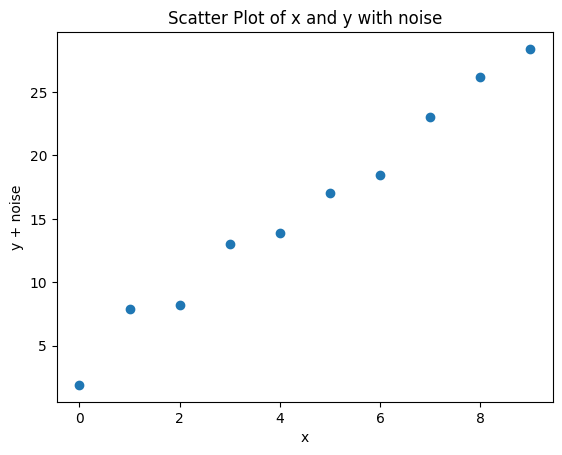

In [14]:
x = [i for i in range(10)]
y = [3 * i + 2 + np.random.normal(0, 1) for i in x]
plt.scatter(x, y)
plt.title("Scatter Plot of x and y with noise")
plt.xlabel("x")
plt.ylabel("y + noise")

Compute the correct linear regression coefficients using numpy as above. Check they are resonable.

In [15]:
X = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(X, y, rcond=None)[0]
a, b

(np.float64(2.789878583346536), np.float64(3.246822147284955))

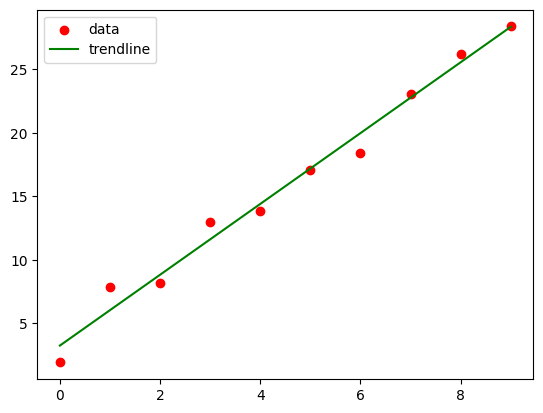

In [16]:
y_pred = [a * i + b for i in x]
plt.scatter(x, y, label = 'data', color='r')
plt.plot(x, y_pred, label = 'trendline', color='g')
plt.legend()
plt.show()

Now compute the regression coefficients using the formulas from class. Begin by defining some very helpful variables: `Sx, Sy` will be $\sum_i {x_i}$ and $\sum_i {y_i}$ respectively. Next `Sxx` and `Syy` are the sum of squares: $\sum_i {x_i}^2$ and $\sum_i {y_i}^2$. Finally the inner product `Sxy` = $\sum_i x_iy_i$. The quickest way to do this involves using comprehensions and the `sum` function, but you can use loops for now if you need to.

In [17]:
n = len(x)
Sx = sum(x)
Sy = sum(y)
Sxx = sum([i * i for i in x])
Syy = sum([i * i for i in y])
Sxy = sum([i * j for (i, j) in zip(x, y)])

In [18]:
# Print your results
n, Sx, Sy, Sxx, Syy, Sxy

(10, 45, 158.01275772344374, 285, 3149.5053551282576, 941.2223928815861)

Finally determine $a,b$ as in class. Display the absolute errors between your calculations and the ones numpy returned. (They should be close to machine precision, which is $10^{-15}$ give or take.

In [19]:
D = n * Sxx - Sx * Sx
D_a = n * Sxy - Sx * Sy
D_b = Sxx * Sy - Sx * Sxy
D, D_a, D_b

(825, 2301.649831260892, 2678.6282715100897)

In [20]:
a_calc = D_a / D
b_calc = D_b / D
a_calc, abs(a_calc - a), b_calc, abs(b_calc - b)

(2.789878583346536,
 np.float64(0.0),
 3.246822147284957,
 np.float64(1.7763568394002505e-15))

## Least squares function

Did you know python can return two values? Here's an example.

In [21]:
def two_numbers():
    a = 1
    b = 10
    return a,b

In [22]:
A, B = two_numbers()
print(A,B)

1 10


Write a function `linear_least_squares(x,y)` which takes input vectors x,y and returns a,b as above. (

In [23]:
def linear_least_squares(x,y):
    n = len(x)
    Sx = sum(x)
    Sy = sum(y)
    Sxx = sum([i * i for i in x])
    Syy = sum([i * i for i in y])
    Sxy = sum([i * j for (i, j) in zip(x, y)])
    D = n * Sxx - Sx * Sx
    D_a = n * Sxy - Sx * Sy
    D_b = Sxx * Sy - Sx * Sxy
    return D_a/D, D_b/D

## Application

Now, using $a=5, b =-15$, run linear least squares 100 times on 100 vector pairs $(x,y)$, where each of the 100 $x$ are the same but the $y=ax+b+\epsilon$ each have different amounts of Gaussian noise.  Plot the resulting best fit lines all on the same graph.
- Use `np.arange` to make your input vector $x$ cover the domain $[-5,5]$ with a step-size of 0.01
- Create arrays to store all the computed a and b values (you'll use this later)
- If you call `plt.plot()` in a loop, it will keep adding to the same plot
- Give your plot a title!

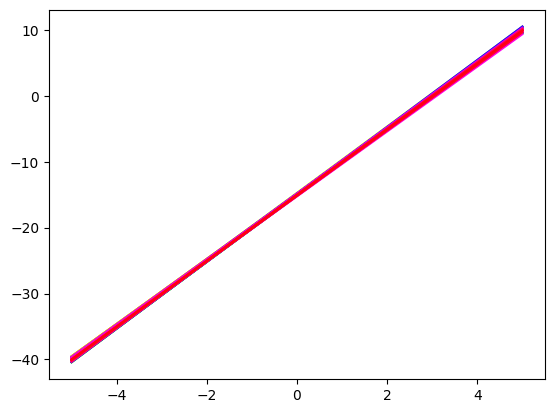

In [24]:
import colorsys
x_values = np.arange(-5, 5.01, 0.1)
a_values = []
b_values = []
for _ in range(100):
    y = [5 * i - 15 + np.random.normal(0, 1) for i in x_values]
    a, b = linear_least_squares(x_values, y)
    a_values.append(a)
    b_values.append(b)
    y_pred = [a * i + b for i in x_values]
    plt.plot(x_values, y_pred, color=(colorsys.hsv_to_rgb(_/100, 1, 1)))
plt.show()

Determine the average of the $a$s and $b$s returned above. Compare these to the true $a,b$. Explain your result.(There is an `np.mean` function)

In [25]:
_a = np.mean(a_values)
_b = np.mean(b_values)
_a, _b, abs(_a - a), abs(_b - b)

(np.float64(4.998079625017331),
 np.float64(-15.01328607685803),
 np.float64(0.008238895293327886),
 np.float64(0.038659365779937005))

The average values are close, but not exactly, the true values of a and b. This is because of the random noise introduced by the epsilon function during data generation. The a value seems significantly closer to 5 than the b value is to -15 (around 0.002 vs 0.03). This is likely because of the slope of the line being a tighter restriction on the regression compared to the y-intercept

Make two histogram plots of the calculated $a$ and $b$ values `plt.hist` works nicely and adding a semicolon suppressed the nasty text output (you'll see)

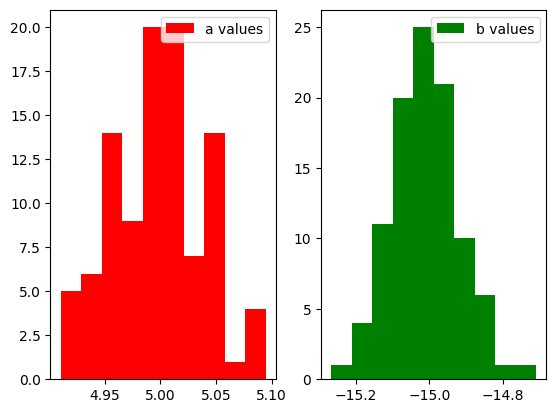

In [26]:
fig, (aplot, bplot) = plt.subplots(1, 2)
aplot.hist(a_values, color='r', label="a values");
aplot.legend()
bplot.hist(b_values, color='g', label="b values");
bplot.legend()
plt.show()